### Importing libraries for the analysis


In [1]:

import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns   
from scipy import stats
%matplotlib inline 



### Reading in the data from the `csv` sources

#### `application_data.csv`


In [3]:
application_data=pd.read_csv("../data/raw/application_data.csv")
application_data.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


To get a general sense of how the `age` correlates to the `TARGET` variable, we can analyze what is the distribution of `age of applicants`. 

For this we converted the `DAYS_BIRTH` variable to years and added a derived variable to the dataframe called `AGE`.

Below is the description of the `AGE` column in the `application_data`


In [7]:

(application_data['DAYS_BIRTH'] / -365).describe()



count    307511.000000
mean        -43.936973
std          11.956133
min         -69.120548
25%         -53.923288
50%         -43.150685
75%         -34.008219
max         -20.517808
Name: DAYS_BIRTH, dtype: float64


We can see from the below graph that this is almost a normal distribution and the maximum number of people lie within the 30-50 age group.


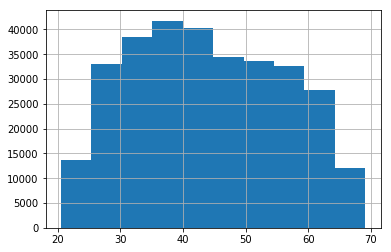

In [13]:

(application_data['DAYS_BIRTH'] / -365).hist()


In [27]:

application_data['AGE'] = (application_data['DAYS_BIRTH'] / -365)

application_data['AGE'].head()


0    25.920548
1    45.931507
2    52.180822
3    52.068493
4    54.608219
Name: AGE, dtype: float64

Now we need to segregate the `AGE` into groups of 

- 20-30
- 30-40
- 40-50
- 50-60


In [44]:
def classify_age(age):
    if (20<=age<30):
        return "20s"
    elif (30<=age<40):
        return "30s"
    elif (40<= age<50):
        return "40s"
    else:
        return "50s"
    






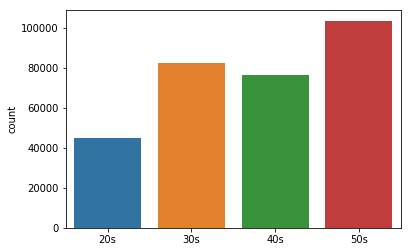

In [49]:


application_data['AGE_GROUP'] = application_data['AGE'].apply(lambda x: classify_age(x))

sns.countplot(sorted(application_data['AGE_GROUP']))





Now let's see how the age is correlated to the `TARGET` variable


In [18]:

def plot_re(df,t1='',t2=''):
    f,ax=plt.subplots(1,2,figsize=(10,6))
    df[[t1,t2]].groupby([t1]).count().plot.bar(ax=ax[0],color='Green')
    ax[0].set_title('count of customer Based on'+t1)
    sns.countplot(t1,hue=t2,data=df,ax=ax[1],palette="spring")
    ax[1].set_title(t1+': Repayer vs Defualter')
    # Rotate x-labels
    plt.xticks(rotation=-90)
    a=plt.show()
    return a

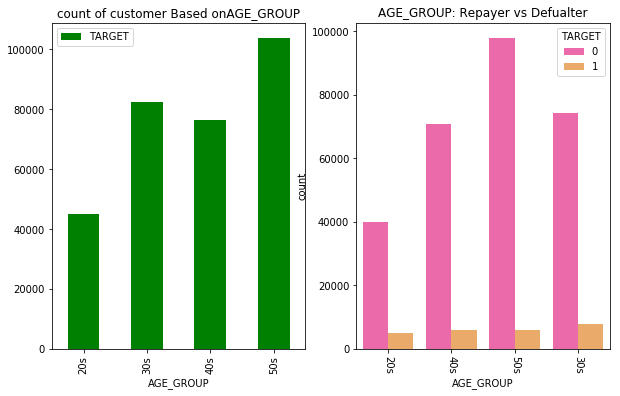

In [51]:
plot_re(application_data,'AGE_GROUP','TARGET')




Now let us try to correlate this with the number of years of employment, which we derive by using `DAYS_EMPLOYED` variable.


In [4]:

(application_data['DAYS_EMPLOYED'] / -365).head()





0    1.745205
1    3.254795
2    0.616438
3    8.326027
4    8.323288
Name: DAYS_EMPLOYED, dtype: float64

In [84]:

application_data[['TARGET','DAYS_BIRTH','DAYS_EMPLOYED' ]].corr()


,TARGET,DAYS_BIRTH,DAYS_EMPLOYED
TARGET,1.000000,0.078239,-0.044932
DAYS_BIRTH,0.078239,1.000000,-0.615864
DAYS_EMPLOYED,-0.044932,-0.615864,1.000000


In [ ]:
application_data[['AGE', 'TARGET']].corr


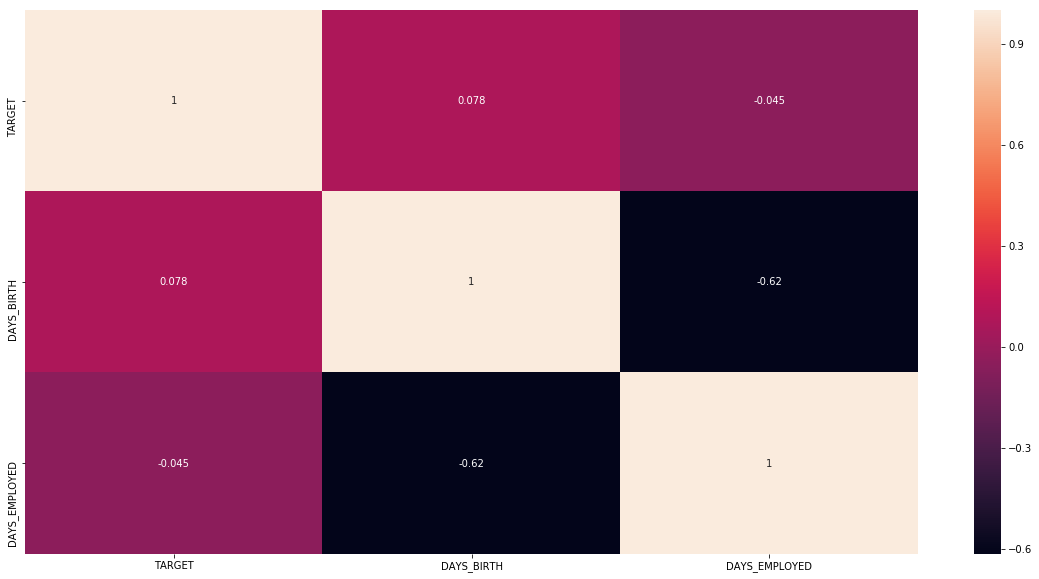

In [78]:

corrmat = application_data[['TARGET','DAYS_BIRTH','DAYS_EMPLOYED' ]].corr()
top_corr_features = corrmat.index[abs(corrmat["TARGET"])>=0.03]
plt.figure(figsize=(20,10))
g = sns.heatmap(application_data[top_corr_features].corr(),annot=True)